Tarea 1

Genómica Computacional - 2024II
Fecha de entrega: jueves 7 de marzo

# 1. Instrucciones

Responde las siguientes preguntas y haz las implementaciones en código como se indica a continuación:

Indica los integrantes de tu equipo en un archivo de texto llamado 00Integantes.txt. Todos deberán presentar la misma tarea dentro de la actividad en el classroom.

Haz las implementaciones en un script python que se llame tarea n.py o bien en un notebook que se llame igual.

Sube todos los archivos a la entrada de la tarea correspondiente en el classroom (preferentemente sin comprimir a menos de que sea inevitable debido a su tamaño o complejidad).

## 2. Expresiones regulares
1. Realiza los siguientes ejercicios sobre expresiones regulares.

a) ¿Describe con lenguaje natural la siguiente expresión regular _r’[CG]{3}(TA){4,5}(CG)’_ Da un par de ejemplos que la cumplan (El alfabeto es Σ = {A, C, G, T}).

Son las cadenas que inician r' , luego 3 caracteres G o C, luego una secuencia de entre 4 y 5 veces el par TA y finalmente CG. Unos ejemplos de esta serían CCGTATATATATACG, CCCTATATATACG y GGCTATATATATACG

b) A continuación se presentan 10 secuencias hipotéticas. Diseña una expresión regular que detecte regiones codificantes válidas y específica cuales de las secuencias la cumplen:
0. ATATATACATACTGGTAATGGGCGCGCGTGTGTTAAGTTCTGTTGTAGGGGTGATTAGGGGCG
1. GGCCCACACCCCACACCAATATATGTGGTGTGGGCTCCACTCTCTCGCGCTCGCGCTGGGGAT
2. ATAAGGTGTGTGGGCGCGCCCCGCGCGCGCGTTTTTTCGCGCGCCCCCGCGCGCGCGCGCGCG
3. GGCGCGGGACGCGGCGGCGGATCCCGATCCGTGCGTCAATACTATTATGGCCAGATAGAATAA
4. GTGCTGCTGCGGCGCCCACACCTATTATCTCTCTCTCTCTGCCTCTCCACCTCGGGGCTTAAT
5. GCGCTGCTGCTGGCTCGATGGGCGCGTGCGTCGTAGCTCGATGCTGGCTCGAGCTGTAATCTT
6. GGCGCTCGCTCGGATGCGCGGCCGGGCTCTCTGCTCGCGCTCGCTTCGCGCTCGTGACCGCTG
7. AATTGGTGCGCGCTCGCGCACACACAGAGAGAGGGTTTATATAGGATGATATATCCACATTGG
8. ATGCTGCTGCTGGCTCTGCTTGCGCTCTGCTCGCTGGGGTGTGTGTGCCGCGCGCTGCTGCTC
9. GCTGGGCTCGCTCGATGCGCGCGGGCGCGCGACCGCGGACGGCGTCGCTGCTAAATGGGCTTC

Las regiones codificantes se encuentran encapsuladas entre el codón de inicio ATG y alguno de los codones de término TAA, TAG o TGA. Podemos ver que nuestras secuencias no necesariamente inician o acaban con dichos codones, por lo tanto la expresión regular que determina esta regla sería r'[ATCG](poner que en múltiplos de 3)+ATG([ATCG](multiplos de 3))+((TAA|TAG|TGA))

## 3. Probabilidad y estadística

### 1. En el archivo promotores.txt se encuentra la lista de secuencias tomadas del genoma de Vitis vinifera y cada una de las secuencias puede que tenga alguno de las diferentes formas en las que se ha encontrado el promotor GATA: Este se caracteriza por tener una región fija con la identidad GATA pero estar precedido ya sea por A o T, y seguido de A o G.

Deseamos estudiar estas regiones en función del promotor GATA y por lo tanto lo primero que deseamos es saber cuántas veces aparecen los promotores en cada región.

- Haz un script en python que lea todas las líneas en promotores.txt y cuya salida sen un archivo llamado
promotores conteo.txt. Este debe contener en cada línea la siguiente información: la secuencia analizada y la cantidad de promotores encontrados. Un ejemplo de la salida se muestra en la figura 1.

- Haz un boxplot con la distribución de cada uno de los promotores

- ¿Cuál es la media y desviación estándar de cada promotor?

In [ ]:
import re

In [ ]:
# leeamos el archivo promotores.txt
with open('promotores.txt', 'r') as f:
    promotores = f.readlines()


def contar_promotores(secuencia):
    # Aplicar regular expresion [AT](GATA)[AG] y contar cuantas veces se repite
    lista_promotores = re.findall(r'[AT](GATA)[AG]', secuencia)
    return len(lista_promotores)

dict_promotores = {}
for i in range(len(promotores)):
    key = promotores[i].split()[0]
    value = promotores[i].split()[1]
    num = contar_promotores(value)
    dict_promotores[key] = num

# Escribir el archivo promotores_contados.txt
with open('promotores_contados.txt', 'w') as f:
    for key, value in dict_promotores.items():
        f.write(f'{key}\t{value}\n')

In [ ]:
# Importar librerias
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Hacer boxplot con la distribucion de promotores
Secuencia = dict_promotores.keys()
l_promotores = dict_promotores.values()
df = pd.DataFrame({'Secuencia': Secuencia, 'Promotores': l_promotores})

In [ ]:
# Calcular la media y la desviacion estandar de los promotores
media = df['Promotores'].mean()
desviacion = df['Promotores'].std()
print(f'La media de promotores es: {media}')
print(f'La desviacion estandar de promotores es: {desviacion}')

### 3.2 Haz un script en python que reciba como parámetro un entero que determinará la cantidad de iteraciones para el siguiente algoritmo

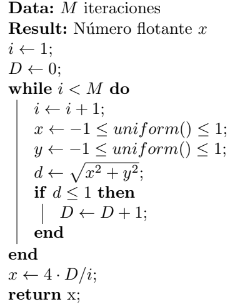

In [ ]:
import numpy as np

In [ ]:
def algoritmo_misterio(iteraciones):
    i = 0
    D = 0
    rng = np.random.default_rng(12346)  # Create a default random number generator
    while i < iteraciones:
        i = i + 1
        # Generate two random numbers between -1 and 1 using a uniform distribution
        x = rng.uniform(-1, 1)
        y = rng.uniform(-1, 1)
        d = np.sqrt(x**2 + y**2)
        if d <= 1:
            D = D + 1
    x = 4 * D / i
    return x

¿Qué está calculando el algoritmo?
La función `algoritmo_misterio` es una implementación en Python del método Monte Carlo para estimar el valor de Pi. 

1. La función toma un argumento, `iteraciones`, que representa el número de iteraciones que ejecutará el algoritmo.

2. Dos variables, `i` y `D`, se inicializan a 0. `i` es un contador para el bucle, y `D` es un contador para el número de puntos que caen dentro del círculo unitario.

3. Se crea un generador de números aleatorios `rng` utilizando la función `default_rng` de NumPy con una semilla de 12346. Esto asegura que la secuencia de números aleatorios generados es la misma cada vez que se ejecuta la función.

4. Se inicia un bucle `while`, que se ejecutará mientras `i` sea menor que `iteraciones`.5. Dentro del bucle, `i` se incrementa en 1, y se generan dos números aleatorios `x` e `y` utilizando el método `uniform` de `rng`. Estos números están entre -1 y 1 y representan un punto en un plano 2D.

6. Se calcula la distancia `d` desde el origen (0,0) al punto `(x, y)` utilizando el teorema de Pitágoras.

7. Si `d` es menor o igual que 1, significa que el punto está dentro de la circunferencia unitaria, y `D` se incrementa en 1.

8. Después de que el bucle se haya ejecutado `iteraciones` veces, se calcula la relación entre el número de puntos que cayeron dentro del círculo unitario y el número total de puntos generados. Este cociente es aproximadamente igual al área del círculo unitario, que es Pi/4. Por lo tanto, para estimar Pi, este cociente se multiplica por 4.

9. Se devuelve el valor estimado de Pi.

In [ ]:
print(algoritmo_misterio(100000))

### 4. Descarga del GenBank la secuencia del virus del SARS-Cov2 y encuentra:


In [ ]:
# Lee el archivo de secuencias
with open('sequence-SARS-Cov2.fasta', 'r') as f:
    secuencias = f.readlines()
# Quita el encabezado
secuencias = secuencias[1:]
# Quita el salto de línea
secuencias = [s.strip() for s in secuencias]

a) El número de ORF’s dentro de la misma, sin importar su longitud, pero debe de tratarse de ORF viables.

In [109]:
#Los marcos de lectura abiertos (ORF) se definen como tramos de secuencia de ADN entre los codones de inicio y de parada.
#Los codones de inicio son ATG y los codones de parada son TAA, TAG y TGA.

# Definir una función que encuentre los ORFs en una secuencia
def encontrar_ORFs(secuencia):
    ORFs = []
    for i in range(0, len(secuencia), 3):
        codon = secuencia[i:i+3]
        if codon == 'ATG':
            ORF = codon
            for j in range(i+3, len(secuencia), 3):
                codon = secuencia[j:j+3]
                ORF += codon
                if codon in ['TAA', 'TAG', 'TGA']:
                    ORFs.append(ORF)
                    break
    return ORFs

orgs = list()
for secuencia in secuencias:
    ORFs = encontrar_ORFs(secuencia)
    if len(ORFs) > 0:
        orgs.append(ORFs)

print("El numero de secuencias es: ", len(secuencias))
print("El numero de ORFs es: ", len(orgs))
longitudes = [len(orf) for secuencia in orgs for orf in secuencia]
orgs = [orf for secuencia in orgs for orf in secuencia]

El numero de secuencias es:  427
El numero de ORFs es:  58


b) El número de ORF’s cuya longitud nos permita afirmar con una probabilidad menor a 0.05 que se trata de ORF no espurios.

El genoma de una especie codifica genes y otros elementos funcionales, intercalados con nucleótidos no funcionales en una única cadena ininterrumpida de ADN.  Para reconocer los genes que codifican proteínas hay que encontrar tramos de nucleótidos libres de codones de parada (denominados marcos de lectura abiertos u ORF) que sean demasiado largos para que se hayan producido por casualidad 

CHAPTER 2:  GENE IDENTIFICATION. (n.d.). Retrieved from https://web.mit.edu/manoli/www/thesis/Chapter2.html#:~:text=The%20basic%20problem%20is%20distinguishing,at%20least%20100%20amino%20acids.

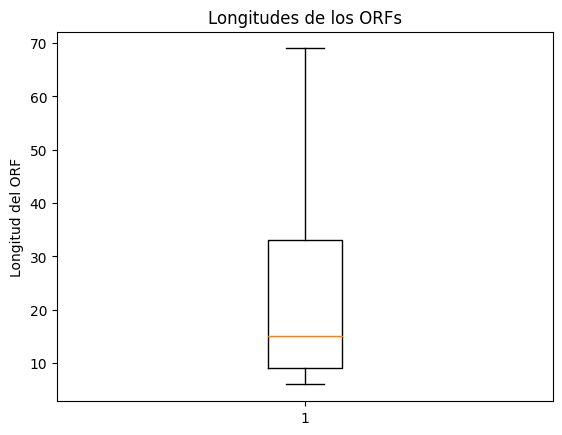

In [110]:
# Hacer un boxplot de las longitudes de los ORFs
plt.boxplot(longitudes)
plt.ylabel('Longitud del ORF')
plt.title('Longitudes de los ORFs')
plt.show()

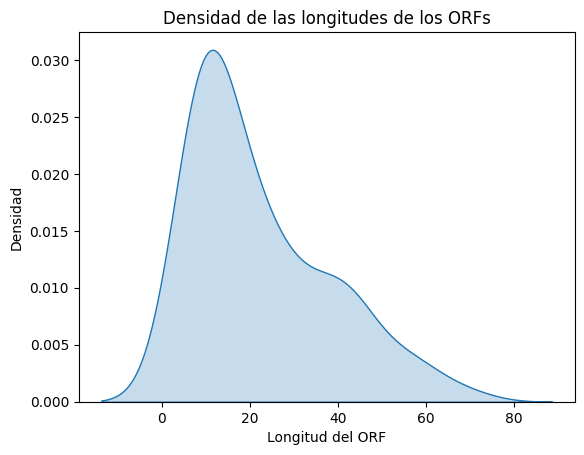

In [111]:
# Hacer diagrama de densidad de las longitudes de los ORFs
sns.kdeplot(longitudes, fill=True)
plt.xlabel('Longitud del ORF')
plt.ylabel('Densidad')
plt.title('Densidad de las longitudes de los ORFs')
plt.show()


In [112]:
# Calcular la longitud máxima de los ORFs
print("La longitud máxima de los ORFs es:", max(longitudes))
# Calcular la longitud promedio de los ORFs
print("La longitud promedio de los ORFs es:", np.mean(longitudes))
# Calcular la desviación estándar de las longitudes de los ORFs
print("La desviación estándar de las longitudes de los ORFs es:", np.std(longitudes))

La longitud máxima de los ORFs es: 69
La longitud promedio de los ORFs es: 22.285714285714285
La desviación estándar de las longitudes de los ORFs es: 15.595418193996599


In [118]:
# Organizar los ORFs por longitud
orgs.sort(key=len, reverse=True)
print("Los 5 ORFs más largos son:")
for i in range(5):
    print(orgs[i])
    

Los 5 ORFs más largos son:
ATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAA
ATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAG
ATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGATAACTTTTGTGCACTTATCTTAG
ATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAA
ATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAA


c) El número de ORF’s cuya longitud nos permita afirmar con una probabilidad menor a 0.01 que se trata de ORF no espurios.

d) Investiga cuál es el número de ORF real y contrástalo con los números encontrados en las dos preguntas anteriores, ¿cuál de los dos números es más cercano al número real?

Este genoma viral contiene al menos seis marcos abiertos de lectura (ORF) (Mousavizadeh & Ghasemi; Ali et al.; Li et al., 2020a,b). El genoma de SARSCoV-2 se puede dividir en tres tercios. Los dos primeros tercios (más cerca del extremo 5’) codifican para el gen de la replicasa viral. Este gen está constituido por dos ORF (ORF 1a y ORF 1b) (Mousavizadeh & Ghasemi), los que, al comienzo de la infección, serán traducidos directamente en dos poliproteínas de gran tamaño llamadas pp1a y pp1ab. Estas poliproteínas posteriormente serán procesadas proteolíticamente para generar 16 proteínas no estructurales (nsps), las cuales estarán implicadas en la replicación del genoma viral y en la transcripción de RNAm subgenómicos (sgRNAs) (Rokni et al.; DaeGyun et al.; Chen et al.; Qingmei et al.). El último tercio del genoma (más cerca del extremo 3’) codifica los genes de las 4 proteínas estructurales principales (proteína (S), proteína (M), proteína (E) y proteína (N)) y lo genes de las proteínas accesorias (proteína (HE), 3, 7a, entre otras) (Mousavizadeh & Ghasemi).

Pastrian-Soto, Gabriel. (2020). Bases Genéticas y Moleculares del COVID-19 (SARS-CoV-2). Mecanismos de Patogénesis y de Respuesta Inmune. International journal of odontostomatology, 14(3), 331-337. https://dx.doi.org/10.4067/S0718-381X2020000300331